### Problem Description:
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
  
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [5]:
#importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform 
import warnings
warnings.filterwarnings('ignore')

### Loading and Preprocessing

In [7]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [12]:
#DataFrame
df=pd.DataFrame(data)

In [14]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [18]:
#info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
#number of columns and rows
df.shape

(205, 26)

In [24]:
#describing data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [26]:
#checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [28]:
#checking for duplicates
df.duplicated().sum()

0

In [38]:
#dropping car_id
df.drop('car_ID',inplace = True,axis=1)

In [40]:
# Extract brand from CarName
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df= df.drop(columns=['CarName'])

In [42]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [72]:
df1 = df.copy(deep = True)

In [74]:
#numerical
numerical =  df1.select_dtypes(include = 'number')
numerical

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [76]:
#categorical
categorical = df1.select_dtypes(include = 'object')
categorical

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


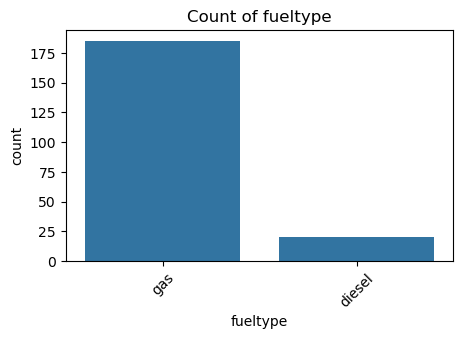

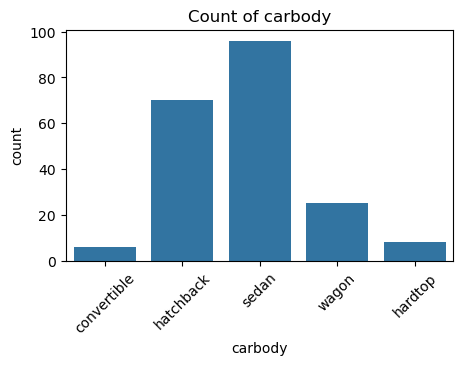

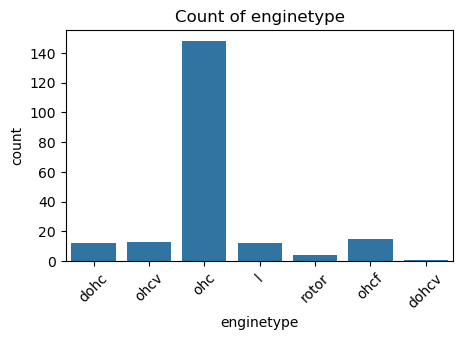

In [52]:
selected_categorical=(['fueltype','carbody', 'enginetype'])
for col in selected_categorical:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

##### Insights :
* OHC : Overhead Camshaft type of engines are more prefered.
* Sedan is the most demanded one and then Hatchback.
* Gas type fuel is mostly used than Diesel.

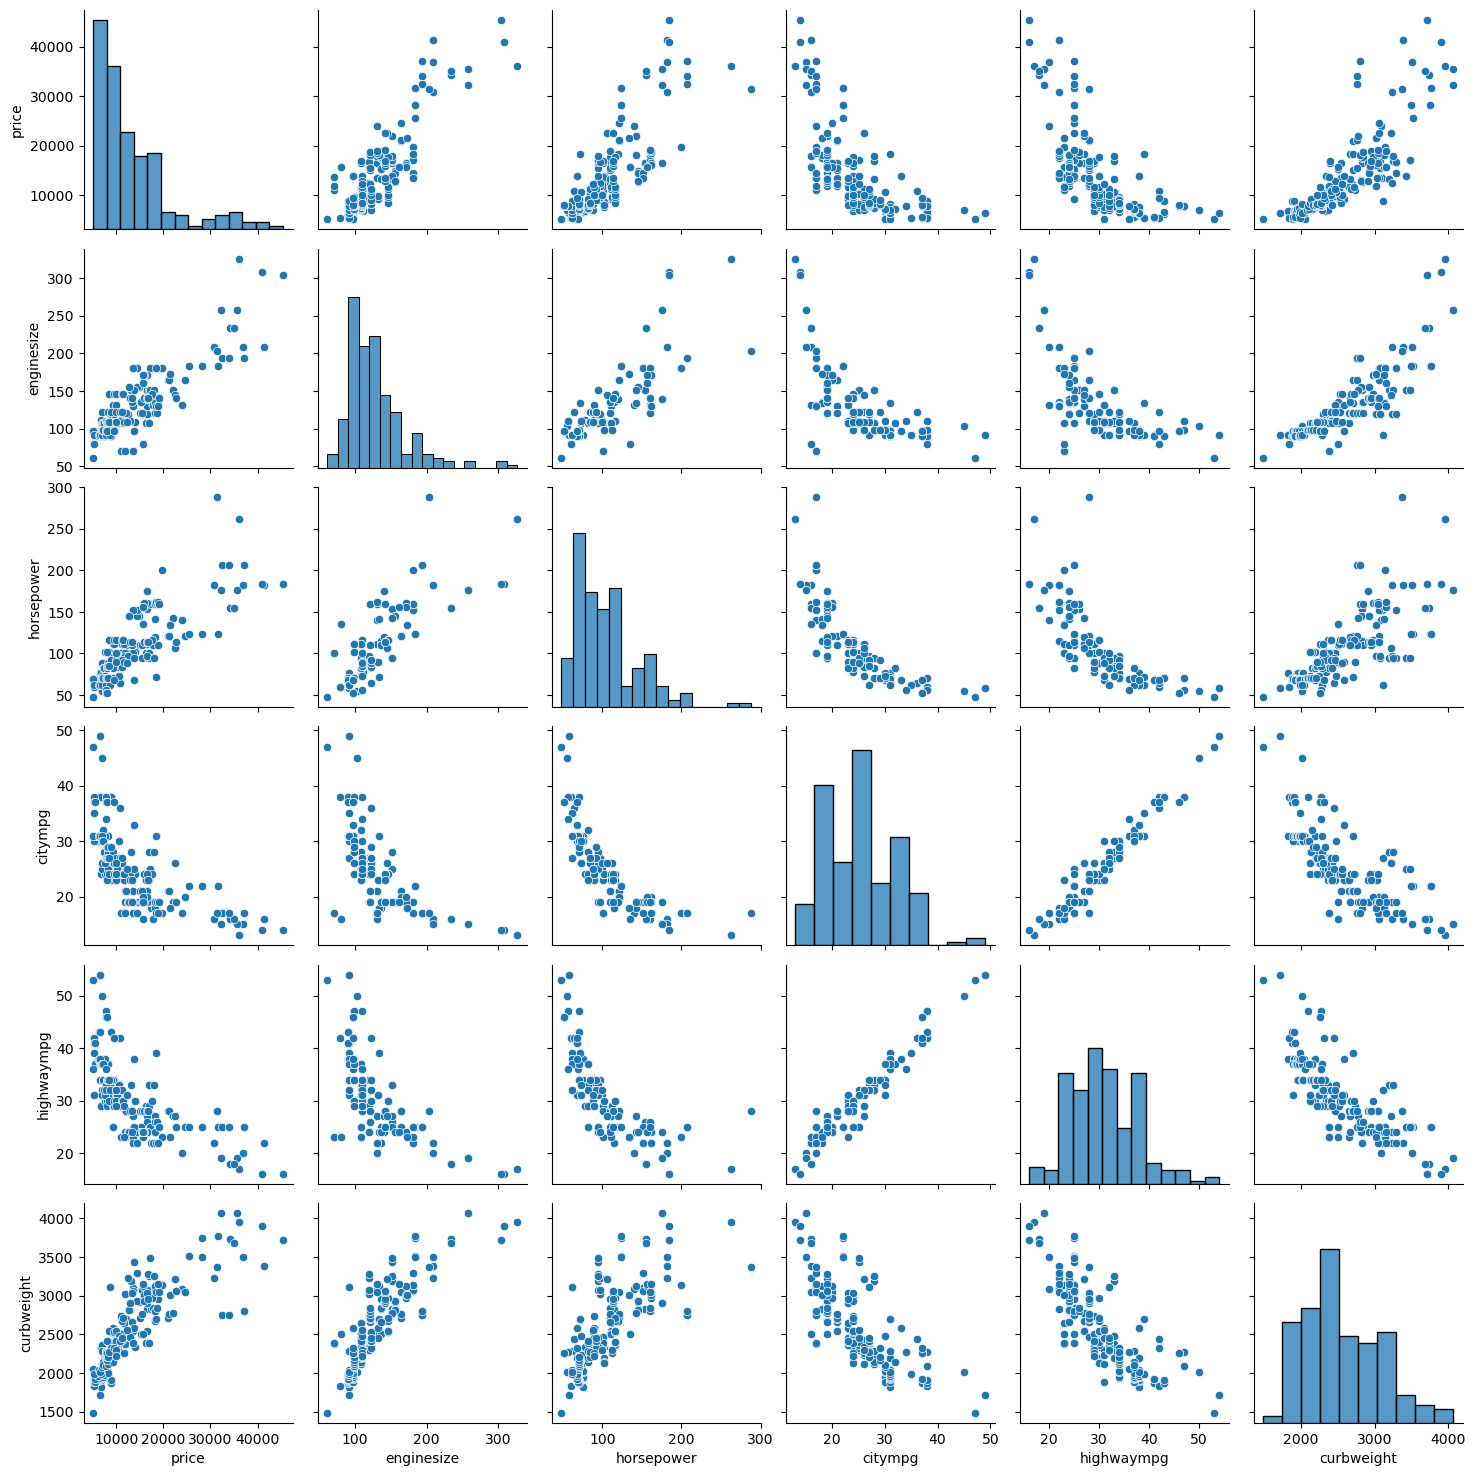

In [56]:
#Pair plot for individual feature with price

sns.pairplot(data[['price', 'enginesize', 'horsepower', 'citympg', 'highwaympg','curbweight']])
plt.show()

In [78]:
### Label encoding for Ordinal set of features

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

binary_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
for col in binary_cols:
    df1[col] = le.fit_transform(df1[col]) 

In [80]:
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Checking for outliers and removing

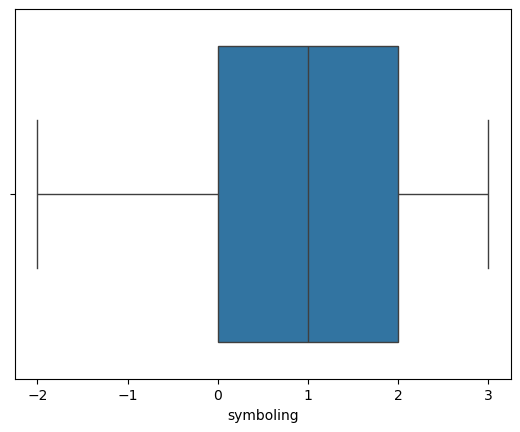

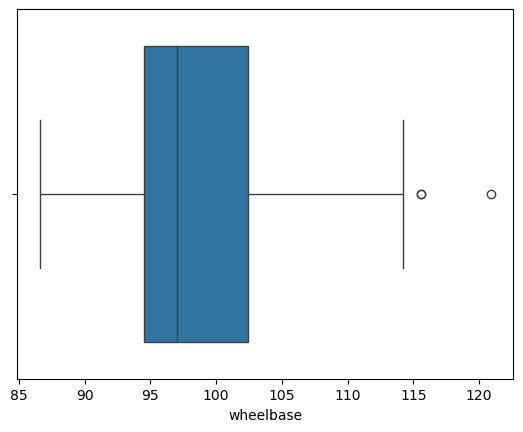

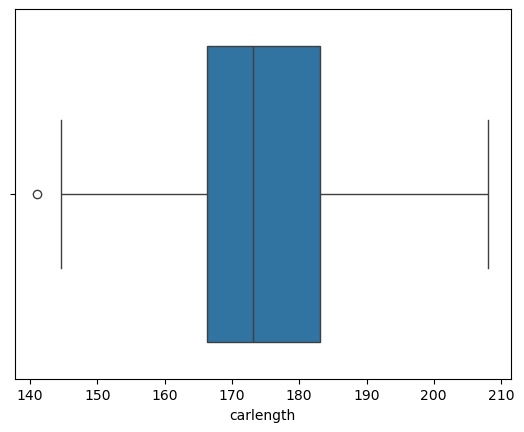

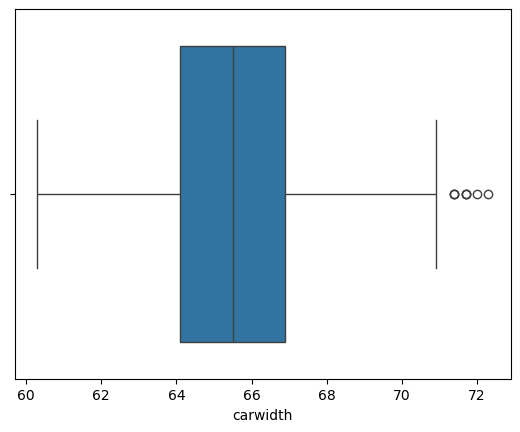

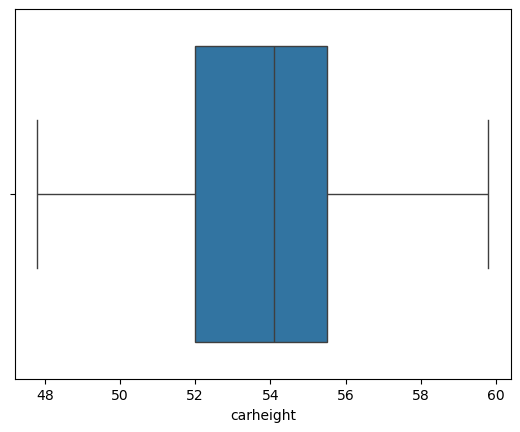

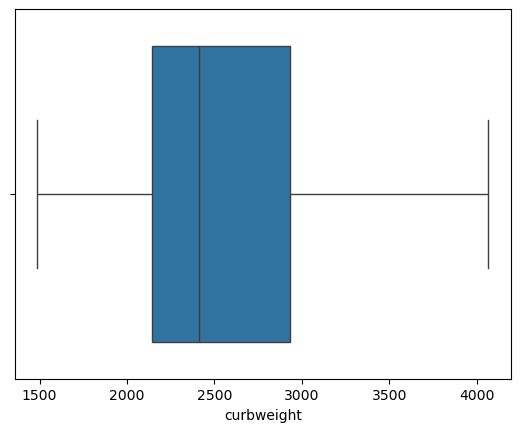

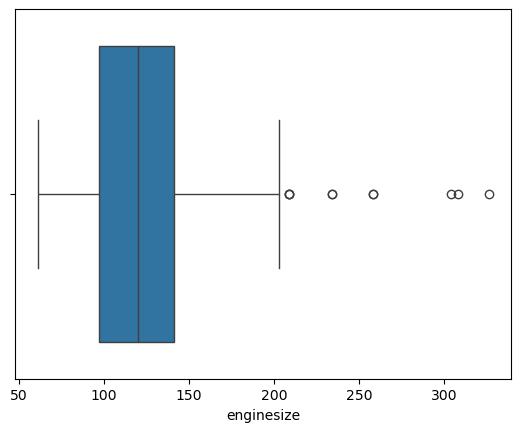

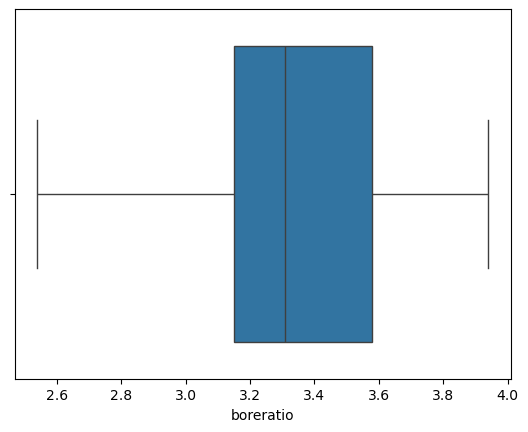

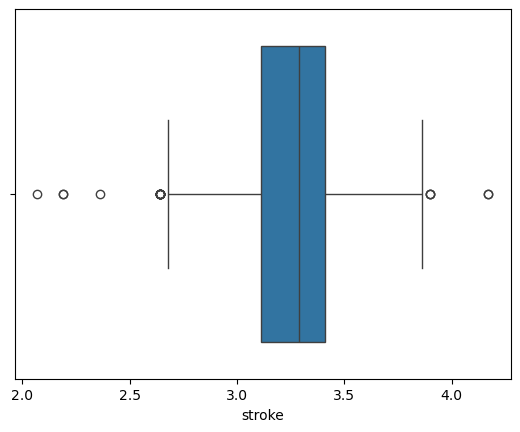

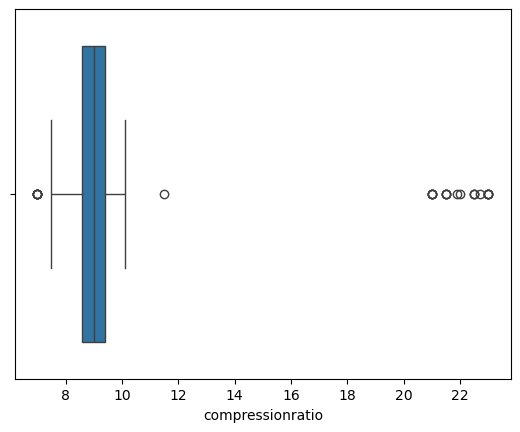

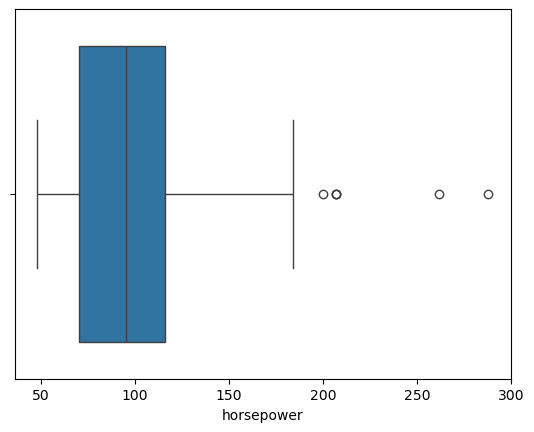

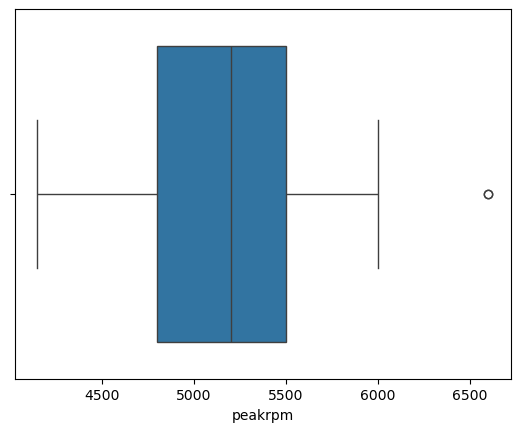

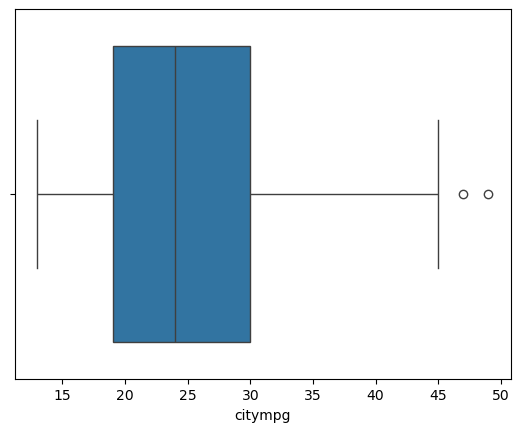

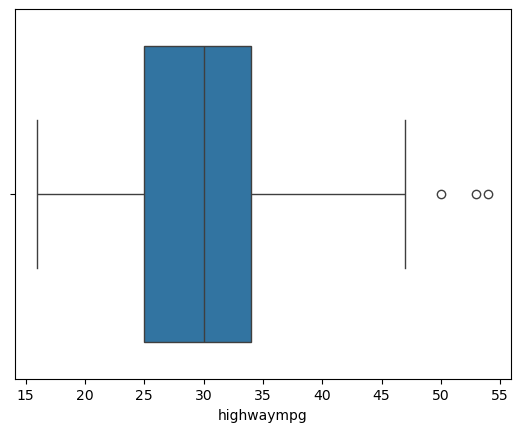

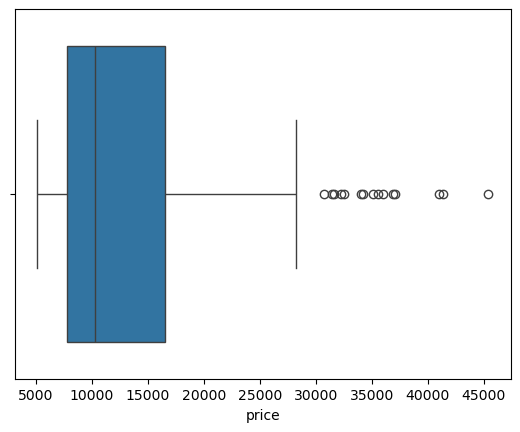

In [82]:
for i in numerical.columns:
    sns.boxplot(data = df1 , x= i)
    plt.show()

### Removing Outliers using IQR Method

IQR:The Interquartile Range (IQR) method is used to detect outliers in a dataset by measuring the spread of the middle 50% of values. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). Any value lower than Q1 - 1.5 × IQR or higher than Q3 + 1.5 × IQR is considered an outlier. This helps in identifying extreme values that may affect data analysis.

In [83]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [86]:
df2=outliers(df1)

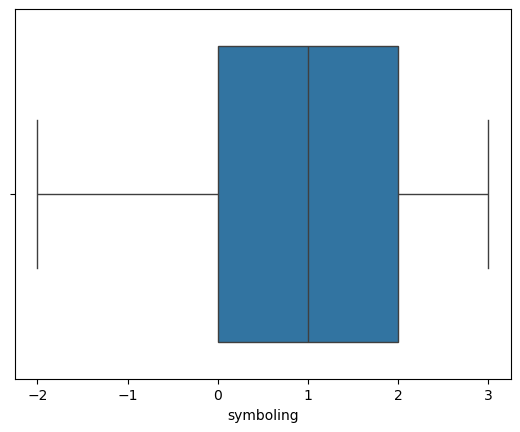

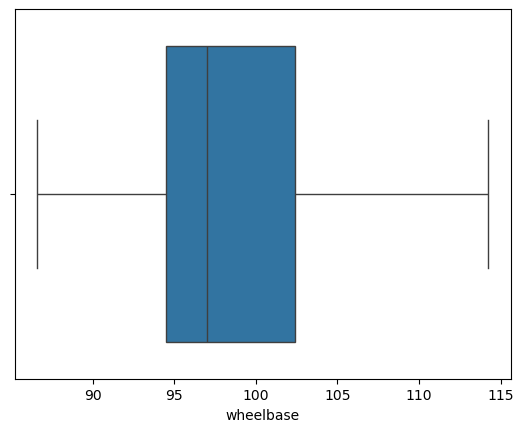

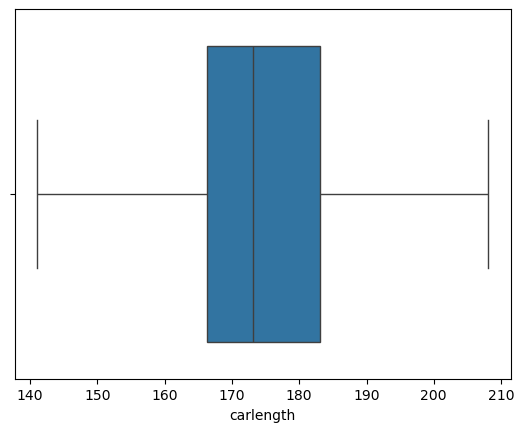

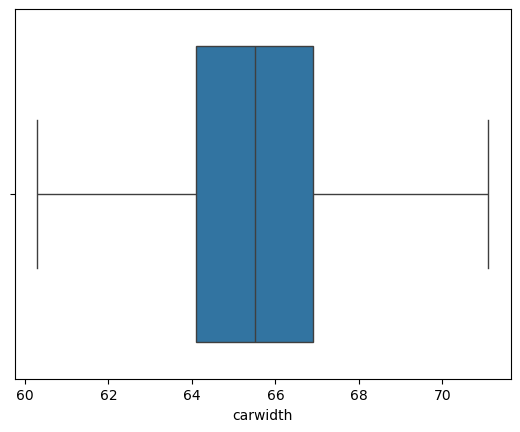

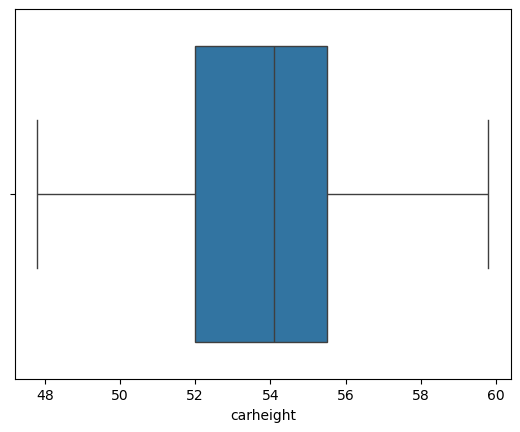

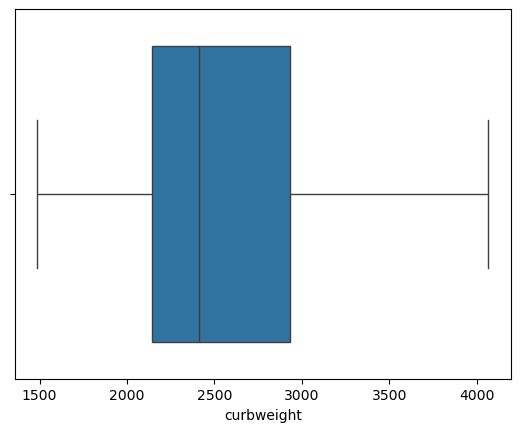

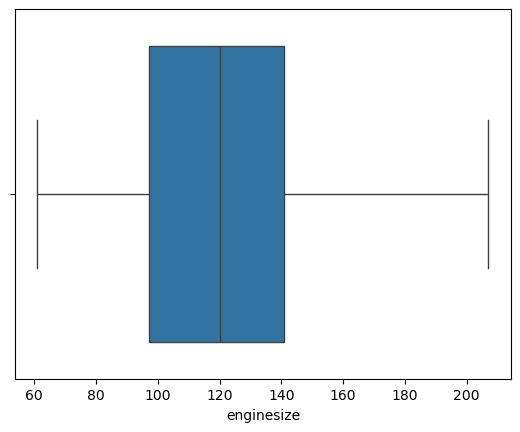

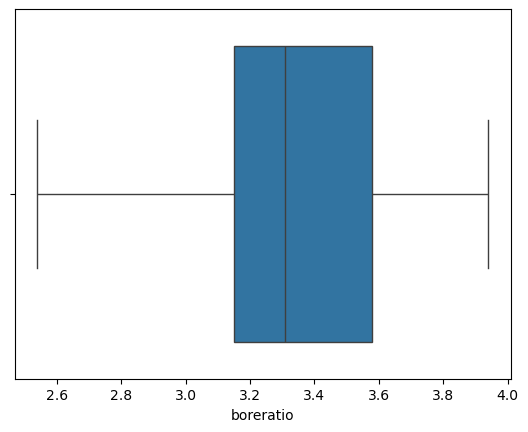

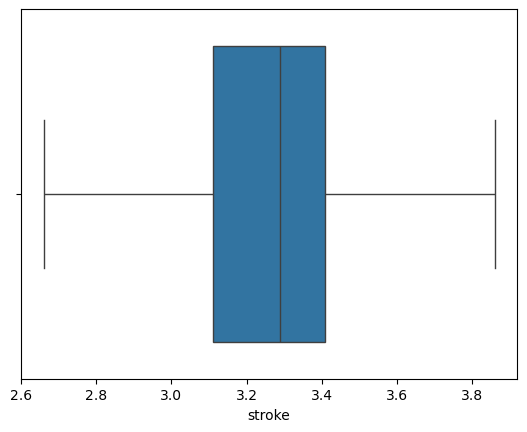

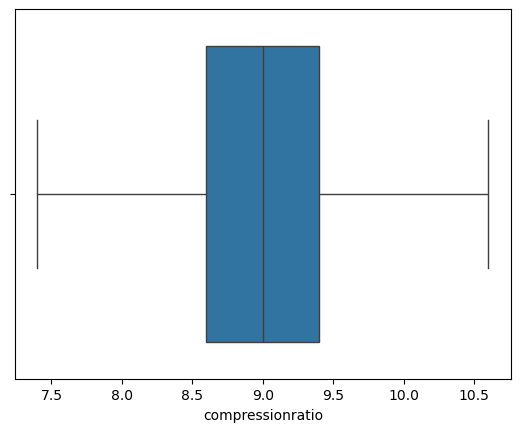

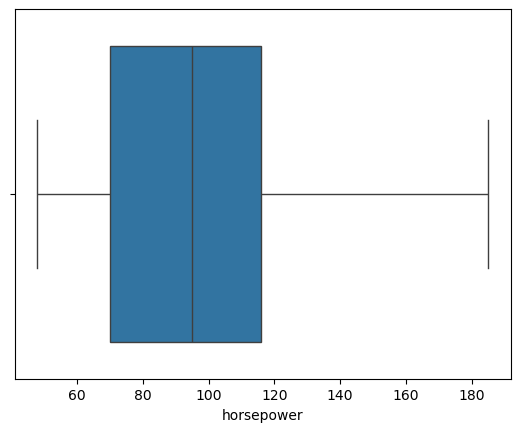

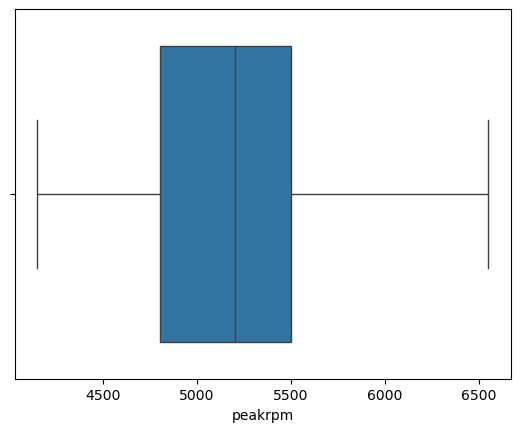

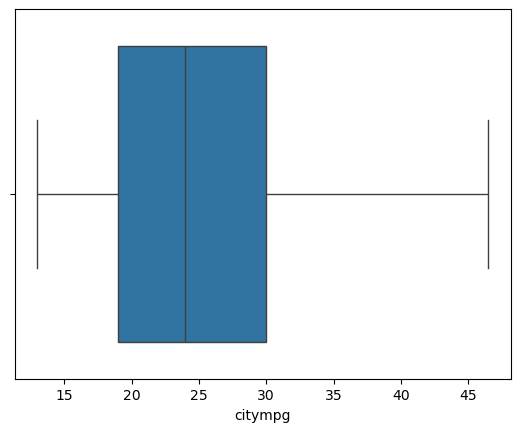

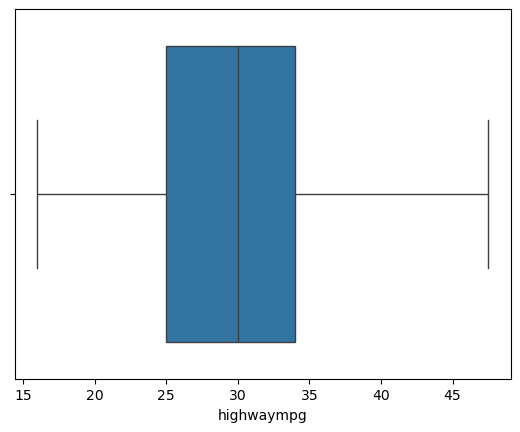

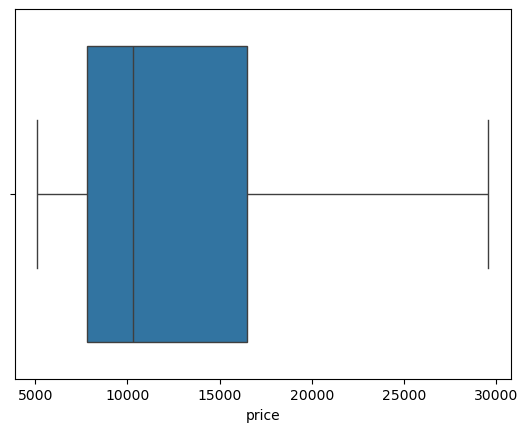

In [88]:
for i in numerical.columns:
    sns.boxplot(data = df2 , x= i)
    plt.show()

In [92]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [94]:
df2['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [96]:
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

df2['cylindernumber'] = df2['cylindernumber'].map(cylinder_mapping)

In [98]:
df1['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

SKEW

In [101]:
df2[numerical_features].skew()

symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

In [103]:
from sklearn.preprocessing import PowerTransformer

In [105]:
pt=PowerTransformer(method='yeo-johnson')

In [107]:
df2[numerical_features]=pt.fit_transform(df2[numerical_features])

In [109]:
df2[numerical_features].skew()

symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

In [111]:
df3=df2[numerical_features]

### Finding Correlation

In [114]:
correlation = df3.corr()
correlation

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.561041,-0.373738,-0.244950,-0.542977,-0.235214,-0.164886,-0.157331,0.008447,-0.064772,0.005957,0.272725,-0.028024,0.052766,-0.122447
wheelbase,-0.561041,1.000000,0.864441,0.770991,0.601500,0.735608,0.557667,0.473830,0.204289,-0.007564,0.433433,-0.352138,-0.460284,-0.529014,0.605542
carlength,-0.373738,0.864441,1.000000,0.852265,0.484915,0.891362,0.739176,0.610873,0.161858,-0.067316,0.646672,-0.288063,-0.673999,-0.709843,0.789525
carwidth,-0.244950,0.770991,0.852265,1.000000,0.273349,0.864943,0.749602,0.582289,0.228472,-0.055679,0.688921,-0.221294,-0.684738,-0.707066,0.803673
carheight,-0.542977,0.601500,0.484915,0.273349,1.000000,0.297671,0.164429,0.169166,-0.037050,0.124442,-0.042055,-0.322103,-0.018681,-0.095025,0.182069
curbweight,-0.235214,0.735608,0.891362,0.864943,0.297671,1.000000,0.859594,0.678555,0.185330,-0.129111,0.805330,-0.251763,-0.811271,-0.835081,0.903951
enginesize,-0.164886,0.557667,0.739176,0.749602,0.164429,0.859594,1.000000,0.657967,0.254338,-0.142806,0.796293,-0.287057,-0.694313,-0.697213,0.808631
boreratio,-0.157331,0.473830,0.610873,0.582289,0.169166,0.678555,0.657967,1.000000,-0.057905,-0.110743,0.614232,-0.257226,-0.578771,-0.583135,0.620367
stroke,0.008447,0.204289,0.161858,0.228472,-0.037050,0.185330,0.254338,-0.057905,1.000000,-0.068067,0.144645,-0.096278,-0.059407,-0.068298,0.126169
compressionratio,-0.064772,-0.007564,-0.067316,-0.055679,0.124442,-0.129111,-0.142806,-0.110743,-0.068067,1.000000,-0.393519,-0.181890,0.460958,0.430946,-0.105516


Text(0.5, 1.0, 'Heatmap Representation of Car Price Data')

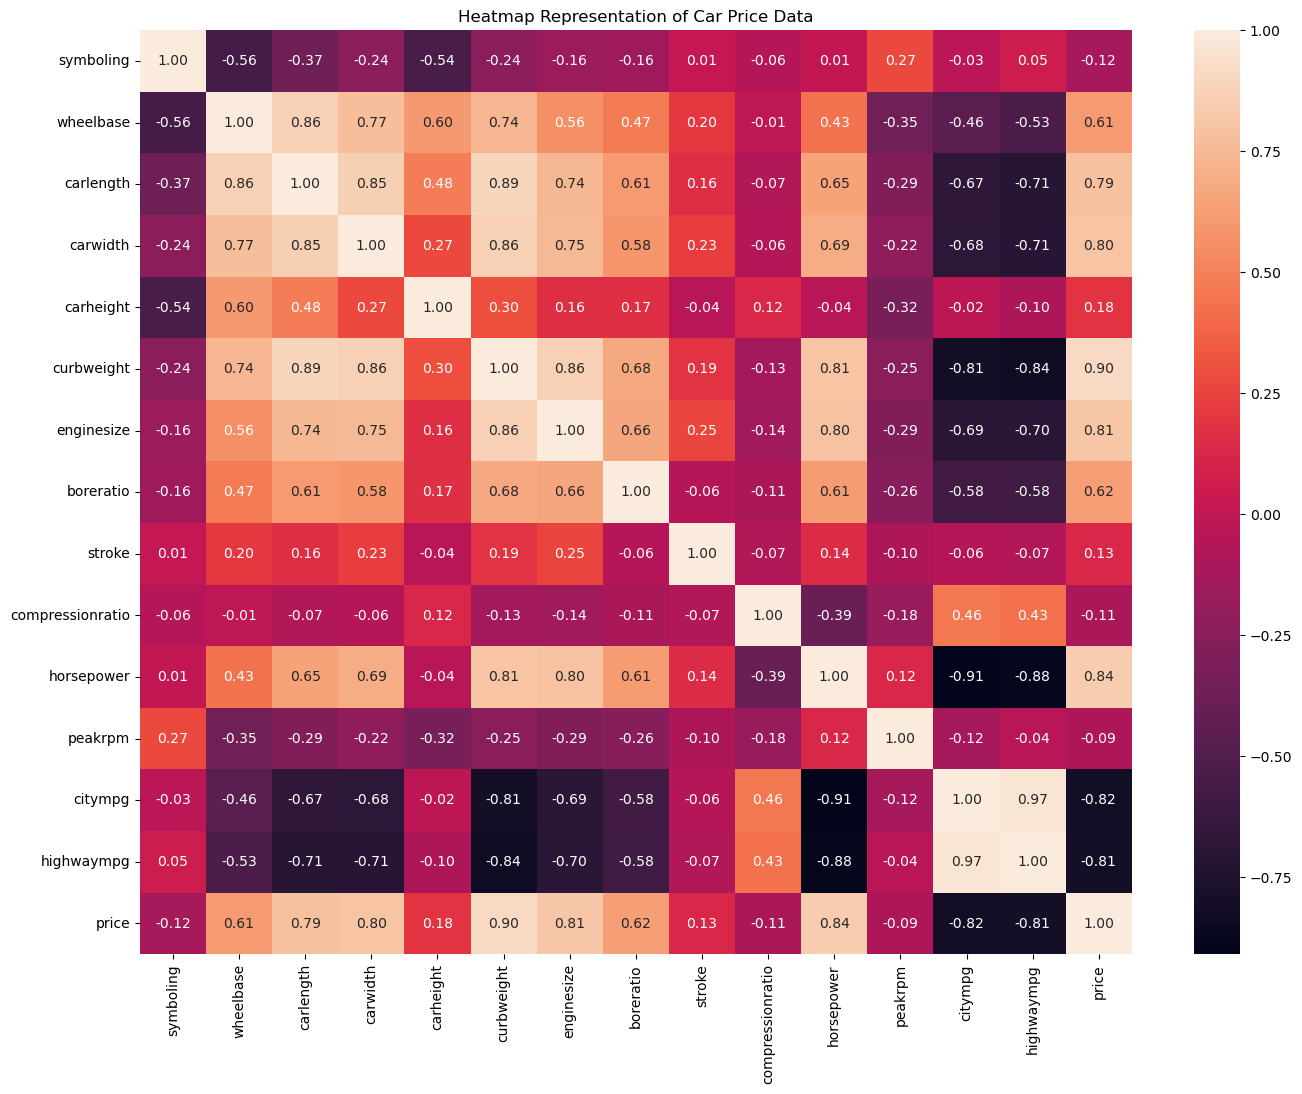

In [116]:
#Heatmap representation of Correlation

plt.figure(figsize = (16,12))
sns.heatmap(correlation , annot = True , fmt = '.2f',cmap = 'rocket')
plt.title('Heatmap Representation of Car Price Data')

In [118]:
from sklearn.feature_selection import SelectKBest,  f_regression

X = df3.drop('price',axis = 1) #independent variable
y = df1['price']  # Target variable

sk =  SelectKBest(score_func = f_regression, k = 15)
x_new = sk.fit_transform(X,y)

# Get selected feature names and scores
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

Feature Scores:
             Feature       Score
5         curbweight  907.059525
10        horsepower  495.002063
12           citympg  412.239963
6         enginesize  383.508860
13        highwaympg  382.900254
3           carwidth  370.267877
2          carlength  335.961288
7          boreratio  127.003580
1          wheelbase  117.533665
4          carheight    6.959996
8             stroke    3.283776
0          symboling    3.089960
9   compressionratio    2.285581
11           peakrpm    1.672592


In [122]:
#Feature scaling using Standard Scaler

scaler=StandardScaler()
dfc_scaled = scaler.fit_transform(df1[selected_features])  # Apply scaling
dfc_scaled = pd.DataFrame(dfc_scaled, columns=selected_features)  # Convert back to DataFrame

In [124]:
dfc_scaled.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.637336,-2.388082,-0.404369,-0.882619,-2.067534,0.144823,0.378551,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712
1,1.637336,-2.388082,-0.404369,-0.882619,-2.067534,0.144823,0.378551,0.525135,-1.943130,-0.044148,0.465420,-0.254290,-0.590218,-0.503712
2,0.194880,-0.703785,-0.205730,-0.076961,-0.533373,0.647098,0.937844,-2.448083,0.740436,-0.044148,1.345802,-0.254290,-0.979465,-0.668315
3,0.939497,0.364324,0.233459,0.284634,0.249497,-0.303501,-0.322568,-0.510857,0.463833,1.211504,0.216601,0.794396,-0.068606,-0.032312
4,0.939497,0.294957,0.233459,0.373447,0.249497,0.648780,0.545752,-0.510857,0.463833,-1.316724,0.566871,0.794396,-1.189069,-1.370772


In [128]:
#Splitting the data
x =dfc_scaled#Independent variable
y = df1['price']  # Target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### MODEL EVALUATION

In [135]:
#Define models in a dictionary

models={
     "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

#Train and evaluate each model
results={}
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}
    print(f"\n-> {name} Performance:")
    print(f"   ➡ MAE: {mae:.4f}")
    print(f"   ➡ MSE: {mse:.4f}")
    print(f"   ➡ RMSE: {rmse:.4f}")
    print(f"   ➡ R2 Score: {r2:.4f}")


-> Linear Regression Performance:
   ➡ MAE: 0.2819
   ➡ MSE: 0.1449
   ➡ RMSE: 0.3806
   ➡ R2 Score: 0.8514

-> Decision Tree Regressor Performance:
   ➡ MAE: 0.1997
   ➡ MSE: 0.0629
   ➡ RMSE: 0.2508
   ➡ R2 Score: 0.9355

-> Random Forest Regressor Performance:
   ➡ MAE: 0.1966
   ➡ MSE: 0.0612
   ➡ RMSE: 0.2475
   ➡ R2 Score: 0.9372

-> Gradient Boosting Regressor Performance:
   ➡ MAE: 0.2200
   ➡ MSE: 0.0714
   ➡ RMSE: 0.2672
   ➡ R2 Score: 0.9268

-> Support Vector Regressor Performance:
   ➡ MAE: 0.3299
   ➡ MSE: 0.2128
   ➡ RMSE: 0.4613
   ➡ R2 Score: 0.7817


In [137]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,MAE,MSE,RMSE,R2 Score
Linear Regression,0.281879,0.144872,0.380621,0.851372
Decision Tree Regressor,0.199668,0.062883,0.250765,0.935487
Random Forest Regressor,0.196578,0.061241,0.247469,0.937172
Gradient Boosting Regressor,0.219985,0.071376,0.267164,0.926774
Support Vector Regressor,0.329934,0.212796,0.461298,0.781689


### Random Forest Regressor 
-> Highest R² Score (0.937172 - Best at explaining variance in price)

-> Lowest MAE (0.194)

-> Lowest MSE (0.062)

-> Lowest RMSE (0.248)

-> Highest R² score (0.937)

### Hyperparameter Tuning:
Performing hyperparameter tuning in Random Forest Regressor (RFR) and check whether the performance of the model has increased.


In [143]:
rf=RandomForestRegressor(random_state=42) #Model define

param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt']
    }
    
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)
    
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
    
print("Best Random Forest Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.9343023763644263
RMSE: 0.25305688303103424


In [151]:
#Fit the new model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [153]:
# Best parameters :
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [155]:
# Best model evaluation
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(x_test)

### Model Evaluation

In [158]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"After Tuning : \n MAE: {round(mae,4)} \n MSE: {round(mse,4)} \n RMSE: {round(rmse,4)} \n R²: {round(r2,4)}")

After Tuning : 
 MAE: 0.2048 
 MSE: 0.064 
 RMSE: 0.2531 
 R²: 0.9343


### Using RandomizedSearchCV

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
rf=RandomForestRegressor(random_state=42)
param_dist = {
        'n_estimators': randint(100, 500),
        'max_depth': randint(10, 100),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    
rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
rf, param_dist, n_iter=100, cv=5, 
scoring='r2', n_jobs=-1, random_state=42
    )
random_search_rf.fit(x_train, y_train)
    
best_rf = random_search_rf.best_estimator_
y_pred = best_rf.predict(x_test)
    
print("Best Random Forest Parameters:", random_search_rf.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))    

Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 267}
R² Score: 0.9356900911906684
RMSE: 0.25036998934830595


In [165]:
#Fit the new model
random_search_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014A7C5D2750>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014A7D965250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014A7C6BE2D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014A7DA36240>},
                   random_state=42, scoring='r2')

In [167]:
# Best parameters :
print("Best Parameters:", random_search_rf.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 267}


In [171]:
# Best model evaluation
best_RF = random_search_rf.best_estimator_
y_pred = best_RF.predict(x_test)

### Model Evaluation

In [174]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"After Tuning : \n MAE: {round(mae,4)} \n MSE: {round(mse,4)} \n RMSE: {round(rmse,4)} \n R²: {round(r2,4)}")

After Tuning : 
 MAE: 0.2046 
 MSE: 0.0627 
 RMSE: 0.2504 
 R²: 0.9357


### Make predictions and comparing with test data

In [179]:
results = pd.DataFrame({"Actual": np.expm1(y_test), "Predicted": np.expm1(y_pred)})# predictions already done before
print(results.head())  # Display first few predictions

       Actual  Predicted
15   4.800096   3.243561
9    1.696012   1.757944
100 -0.245058  -0.337945
132  0.227159   0.566549
68   4.452333   3.468033
